In [42]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt






In [43]:

import pandas as pd

df=pd.read_csv('NSE-TATAGLOBAL.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [44]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [45]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [46]:
opn=df[['Open']]

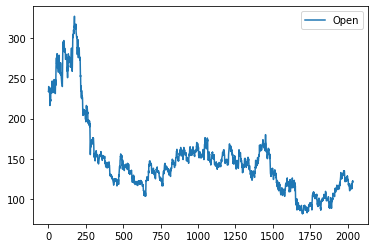

In [47]:
opn.plot()

In [48]:
da=opn.values

In [49]:
da

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

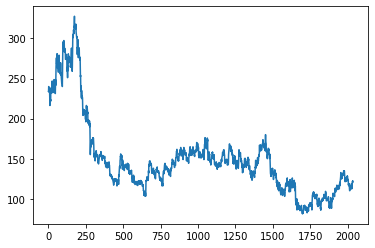

In [50]:
plt.plot(da)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
normalizer=MinMaxScaler(feature_range=(0,1))
da_scaled=normalizer.fit_transform(np.array(da).reshape(-1,1))

In [53]:
len(da_scaled),len(da)

(2035, 2035)

In [54]:
train_size=int(len(da_scaled)*0.80)
test_size=len(da_scaled)-train_size

In [55]:
train_size,test_size

(1628, 407)

In [56]:
da_train,da_test=da_scaled[0:train_size,:],da_scaled[train_size:len(da_scaled),:1]

In [57]:
len(da_train),len(da_test)

(1628, 407)

In [58]:
def create_ds(dataset,step):
  Xtrain,Ytrain=[],[]
  for i in range(len(dataset)-step-1):
    a=dataset[i:(i+step),0]
    Xtrain.append(a)
    Ytrain.append(dataset[i+step,0])
    return np.array(Xtrain),np.array(Ytrain)

In [59]:
time_stamp=100
X_train,y_train=create_ds(da_train,time_stamp)
X_test,y_test=create_ds(da_test,time_stamp)

In [60]:
X_train.shape,y_train.shape

((1, 100), (1,))

In [61]:
X_test.shape,y_test.shape

((1, 100), (1,))

In [62]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [63]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [64]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.6279 - val_loss: 2.3150e-04
Epoch 2/100
1/1 [==============================] - 0s 138ms/step - loss: 0.4961 - val_loss: 0.0016
Epoch 3/100
1/1 [==============================] - 0s 132ms/step - loss: 0.3643 - val_loss: 0.0048
Epoch 4/100
1/1 [==============================] - 0s 134ms/step - loss: 0.2307 - val_loss: 0.0111
Epoch 5/100
1/1 [==============================] - 0s 140ms/step - loss: 0.1056 - val_loss: 0.0229
Epoch 6/100
1/1 [==============================] - 0s 134ms/step - loss: 0.0160 - val_loss: 0.0432
Epoch 7/100
1/1 [==============================] - 0s 134ms/step - loss: 0.0136 - val_loss: 0.0656
Epoch 8/100
1/1 [==============================] - 0s 133ms/step - loss: 0.0900 - val_loss: 0.0729
Epoch 9/100
1/1 [==============================] - 0s 132ms/step - loss: 0.1012 - val_loss: 0.0678
Epoch 10/100
1/1 [==============================] - 0s 133ms/step - loss: 0.0616 - val_loss: 0.0578
Epoch 11

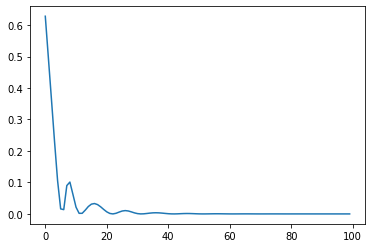

In [66]:
loss=model.history.history['loss']
plt.plot(loss)

In [67]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 30ms/step


In [68]:
train_predict=normalizer.inverse_transform(train_predict)
test_predict=normalizer.inverse_transform(test_predict)

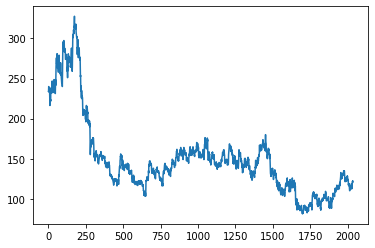

In [69]:
plt.plot(normalizer.inverse_transform(da_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [70]:
len(da_test)

407

In [71]:
fut_inp=da_test[270:]

In [72]:
fut_inp=fut_inp.reshape(1,-1)

In [73]:
tmp_inp=list(fut_inp)

In [74]:
fut_inp.shape

(1, 137)

In [75]:
tmp_inp+tmp_inp[0].tolist()

[array([0.07177616, 0.08069749, 0.07319546, 0.10097324, 0.10178427,
        0.10502839, 0.09529603, 0.10097324, 0.0973236 , 0.09712084,
        0.10016221, 0.09813463, 0.0973236 , 0.09205191, 0.08759124,
        0.09509327, 0.11192214, 0.12570965, 0.12895377, 0.13037307,
        0.12489862, 0.11313869, 0.11111111, 0.11922141, 0.11901865,
        0.12043796, 0.12935929, 0.12854826, 0.13341444, 0.14476886,
        0.14537713, 0.13746959, 0.13665856, 0.13665856, 0.1311841 ,
        0.13341444, 0.12327656, 0.14111922, 0.13746959, 0.13990268,
        0.13017032, 0.14152474, 0.14111922, 0.13138686, 0.12915653,
        0.13098135, 0.1269262 , 0.15166261, 0.15004055, 0.14193025,
        0.16017843, 0.15693431, 0.16504461, 0.1770073 , 0.18146796,
        0.18815896, 0.20924574, 0.19424169, 0.18106245, 0.18207624,
        0.1960665 , 0.17680454, 0.18207624, 0.18004866, 0.18207624,
        0.18876723, 0.19383617, 0.19099757, 0.19505272, 0.19809408,
        0.20640714, 0.19748581, 0.19525547, 0.20

In [76]:
lst_output=[]
n_steps=137
i=0
while(i<30):
  if(len(tmp_inp)>100):
    fut_inp=np.array(tmp_inp[1:])
    fut_inp=fut_inp.reshape(1,-1)
    fut_inp=fut_inp.reshape((1,n_steps,1))
    yhat=model.predict(fut_inp,verbose=0)
    tmp_inp.extend(yhat[0].tolist())
    tmp_inp=tmp_inp[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
      fut_inp=fut_inp.reshape((1, n_steps,1))
      yhat=model.predict(fut_inp,verbose=0)
      tmp_inp.extend(yhat[0].tolist())
      lst_output.extend(yhat.tolist())
      i=i+1


  print(lst_output)


[[0.3976220190525055]]
[[0.3976220190525055], [0.3976220190525055]]
[[0.3976220190525055], [0.3976220190525055], [0.3976220190525055]]
[[0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055]]
[[0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055]]
[[0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055]]
[[0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055]]
[[0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055]]
[[0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055], [0.3976220190525055]]
[

In [77]:
len(da_scaled)

2035

In [80]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

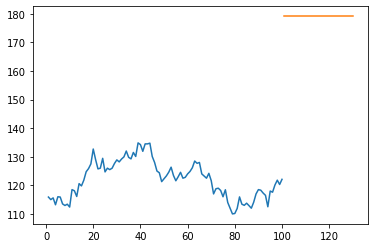

In [86]:
plt.plot(plot_new,normalizer.inverse_transform(da_scaled[1935:]))
plt.plot(plot_pred,normalizer.inverse_transform(lst_output))

In [87]:
da_new=da_scaled.tolist()

In [88]:
len(da_new)

2035

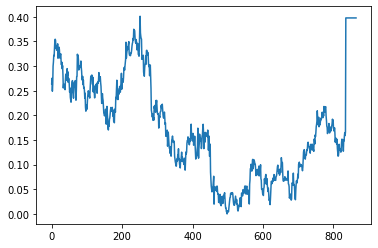

In [89]:
da_new.extend(lst_output)
plt.plot(da_new[1200:])

In [90]:
final_graph=normalizer.inverse_transform(da_new).tolist()

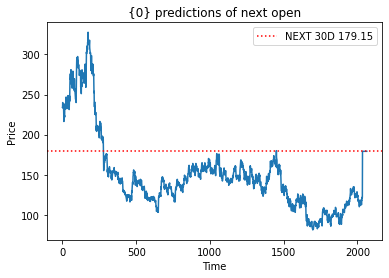

In [92]:
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title(" predictions of next open")
plt.axhline(y=final_graph[len(final_graph)-1],color='red',linestyle=':',label='NEXT 30D {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()